<img src="https://i.pinimg.com/originals/ee/2e/24/ee2e246795a13abc1fe01b28776626ef.jpg" alt= "LOGO CAT" width=400 height=400 align = "right">

<br>
<h1><font color="#7F000E" size=5>TOULOUSE LAUTREC </font></h1>
<h1><font color="#7F000R" size=6> APRENDIZAJE AUTOMATICO CON PYTHON </font></h1>
<h1><font color="#7F000E" size=4> CLUSTERING JERARQUICO
 </font></h1>
<br>
<br>
<div style="text-align:right">
<font color="#7F000E" size=3> Ing. Alexander Valdez</font><br>
<font color="#7F000E" size=3> Curso 2290, Clases Lunes y Miercoles 20:00-22:30pm </font><br>
<font color="#7F000e" size=3> Cuarta Clase </font><br>
</div>

---

## CLUSTERING JERARQUICO


El clustering Jerárquico construye una jerarquía de clusters para realizar el análisis y existen dos categorías para este tipo de clustering:

1. Aglomerante
2. Divisivo

Implementación del enfoque Aglomerante

Como se mencionó anteriormente, el enfoque aglomerante es un enfoque de abajo hacia arriba (bottom-up) en donde inicialmente cada elemento es considerado un cluster, posteriormente se toman los dos puntos más cercanos y se forma un cluster de dos elementos, a partir de ahí se localizan los clusters más cercanos para formar un nuevo cluster y así sucesivamente, hasta que todos los elementos pertenece a un solo cluster. Con ello creamos el **dendograma** para decidir cuantos cluster tendrá la muestra de datos.

Para este ejemplo con python, utilizaremos una muestra de 200 datos de una tienda que ha calificado a sus clientes con una puntuación que va de 1 a 100 de acuerdo a su frecuencia de compra y otras condiciones que ha utilizado dicha tienda para calificar a sus clientes con esa puntuación. En el conjunto de datos tenemos información sobre el género, la edad y el ingreso anual en miles del cliente. Sin embargo, para poder graficar los resultados sólo utilizaremos el ingreso anual y la puntuación para generar los grupos de clientes que existen en esta muestra y analizar dicho resultado con el enfoque aglomerante.

El dendrograma es un diagrama de árbol que muestra los grupos que se forman al crear conglomerados de observaciones en cada paso y sus niveles de similitud.

## DATA

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Clustering Jerárquico

# Importacion de librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Carga del conjunto de datos
dataset = pd.read_csv('/content/drive/MyDrive/DATASET_TOULOUSE_C4/Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values

Importamos las librerías y cargamos el conjunto de datos, indicando que la variable que se analizará es una matriz con las columnas 3 y 4 de conjunto de datos, las cuales corresponden al ingreso anual en miles y la puntuación del cliente.

In [3]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Importamos las librerías y cargamos el conjunto de datos, indicando que la variable que se analizará es una matriz con las columnas 3 y 4 de conjunto de datos, las cuales corresponden al ingreso anual en miles y la puntuación del cliente.

La matriz X es la siguiente:

In [4]:
X[:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]])

Para crear el dendograma utilizamos la clase sch del paquete scipy.hierarchy



El ejecutar el bloque anterior obtenemos el diagrama del dendograma



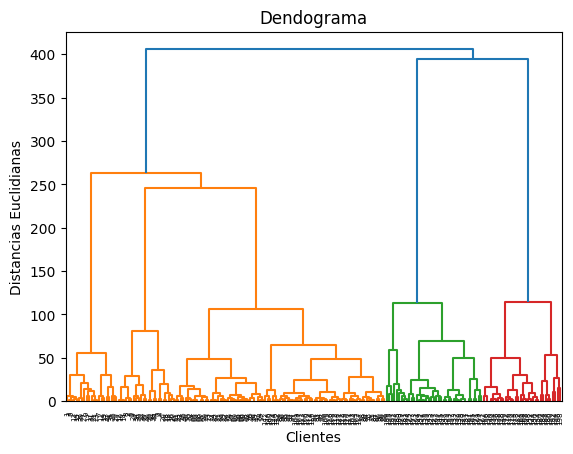

In [ ]:
# Creamos el dendograma para encontrar el número óptimo de clusters

import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

plt.title('Dendograma')
plt.xlabel('Clientes')
plt.ylabel('Distancias Euclidianas')
plt.show()

En el podemos observar que la distancia máxima la marca la línea azul oscuro que une los clusters rojo y azul claro, por lo que si realizamos el corte en esa zona obtenemos:

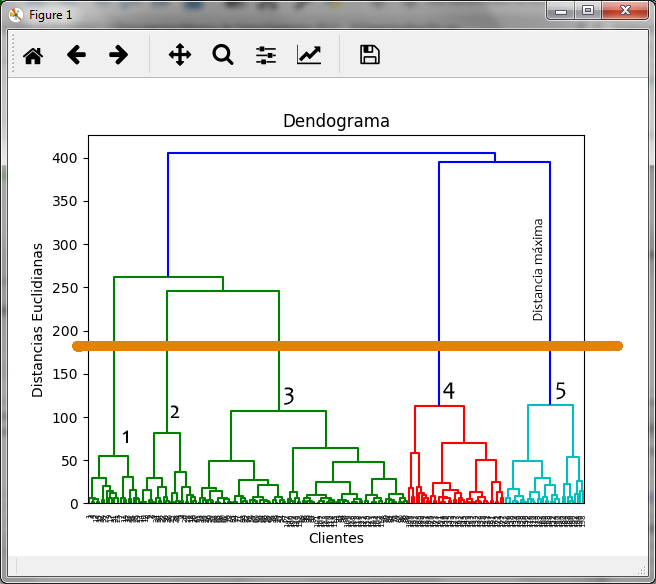

Al marcar con la línea color naranja el dendograma donde observamos la distancia máxima, nos genera 5 clusters que hemos marcado con números.

Con ello en mente, generamos los grupos con el método aglomerante utilizando la clase AgglomerativeClustering del paquete sklearn.cluster

In [5]:
# Ajustando Clustering Jerárquico al conjunto de datos
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5,
                    affinity = 'euclidean',
                    linkage = 'ward')

y_hc = hc.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


En la variable y_hc se guardan los grupos asignados a cada cliente o renglón del conjunto de datos. En ese vector podemos observar los 5 grupos que van de 0 a 4

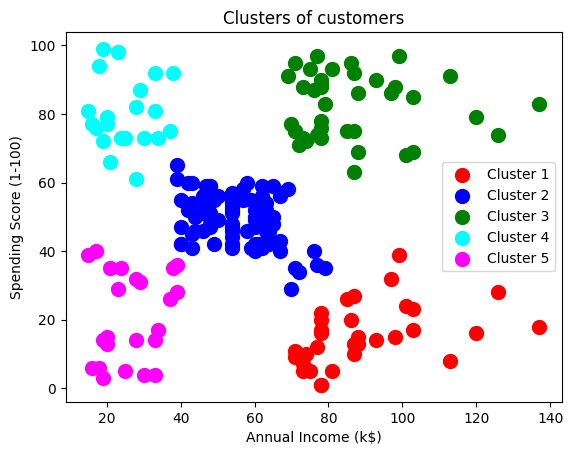

In [ ]:
# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## CONCLUSIONES

En relación al ingreso anual en miles y la puntuación generada por la tienda, observamos un grupo de clientes que podría ser de interés para la tienda. El grupo de clientes en color verde, lo cuales tienen ingresos altos y una puntuación alta, por lo que podrían ser un grupo objetivo para ciertas promociones. En purpura tenemos a los clientes de baja puntuación y bajos ingresos, mientras que en azul claro, a los clientes con ingresos bajos pero con alta puntuación, lo cual podría indicar que estos clientes compran mucho a pesar de los ingresos bajos. Es decir, el análisis cluster permite hacer inferencias y tomar decisiones de negocios.

En el artículo anterior k-Means Clustering resolvemos el mismo caso pero con el método k-Means y obtenemos los mismos resultados.


Una de las desventajas del método jerárquico es que no es muy recomendable para problemas con grandes cantidades de datos, debido a que se generaría un dendograma difícil de manipular para seleccionar el número óptimo de clusters.